# What country has the highest ratio of recovered cases?


In [2]:
# Importing the libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 

In [3]:
# read the data and store it in chosen variable
covid19_file = 'data_team-9/worldometers_coronavirus.csv'
covid19_df_q5 = pd.read_csv(covid19_file)

In [4]:
# Showing top 5 rows
covid19_df_q5.head()

,continent,country_region,total_cases,total_deaths,total_recovered,active_cases,critical,total cases/\n1M pop,deaths/\n1M pop,total_tests,tests/\n1M pop,population
0,Europe,Russia,"405,843","4,693","171,883","229,267","2,300","2,781",32,"10,643,124","72,933","145,929,507"
1,Europe,Spain,"286,509","27,127","196,958","62,424",617,"6,128",580,"4,063,843","86,921","46,753,345"
2,Europe,UK,"274,762","38,489",NaN,NaN,"1,559","4,049",567,"4,285,738","63,158","67,856,881"
3,Europe,Italy,"232,997","33,415","157,507","42,075",435,"3,853",553,"3,878,739","64,144","60,468,778"
4,Europe,France,"188,882","28,802","68,355","91,725","1,319","2,894",441,"1,384,633","21,217","65,261,942"


In [5]:
# Showing all the columns
covid19_df_q5.columns

Index(['continent', 'country_region', 'total_cases', 'total_deaths',
       'total_recovered', 'active_cases', 'critical', 'total cases/\n1M pop',
       'deaths/\n1M pop', 'total_tests', 'tests/\n1M pop', 'population'],
      dtype='object')

In [6]:
# Selecting the data we need
covid19_df_q5 = covid19_df_q5[['country_region','total_cases','total_recovered',]]
covid19_df_q5.head()

,country_region,total_cases,total_recovered
0,Russia,"405,843","171,883"
1,Spain,"286,509","196,958"
2,UK,"274,762",NaN
3,Italy,"232,997","157,507"
4,France,"188,882","68,355"


In [7]:
# Checking the number of rows and columns
covid19_df_q5.shape

(213, 3)

In [8]:
# Information about the df
covid19_df_q5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 3 columns):
country_region     213 non-null object
total_cases        213 non-null object
total_recovered    211 non-null object
dtypes: object(3)
memory usage: 5.1+ KB


In [9]:
# Dropping missing values
covid19_df_q5 = covid19_df_q5.dropna()

In [10]:
# Transforming object(str) to int
covid19_df_q5['total_cases'] = covid19_df_q5['total_cases'].str.replace(',', '').astype(int)

In [11]:
# Transforming object(str) to int
covid19_df_q5['total_recovered'] = covid19_df_q5['total_recovered'].str.replace(',', '').astype(int)

In [12]:
# Double checking that objects have been transform to int
covid19_df_q5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211 entries, 0 to 212
Data columns (total 3 columns):
country_region     211 non-null object
total_cases        211 non-null int32
total_recovered    211 non-null int32
dtypes: int32(2), object(1)
memory usage: 4.9+ KB


In [13]:
# We can see what in some countries total cases = total recovered
covid19_df_q5.tail()

,country_region,total_cases,total_recovered
208,New Zealand,1504,1481
209,French Polynesia,60,60
210,New Caledonia,19,18
211,Fiji,18,15
212,Papua New Guinea,8,8


In [14]:
# Checking what countries have more than 5000 total cases.
# It allows us to consider countries that had bigger outbreaks. 
covid19_df_q5["Cases>5000"]= covid19_df_q5['total_cases'] > 5000
covid19_df_q5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211 entries, 0 to 212
Data columns (total 4 columns):
country_region     211 non-null object
total_cases        211 non-null int32
total_recovered    211 non-null int32
Cases>5000         211 non-null bool
dtypes: bool(1), int32(2), object(1)
memory usage: 5.2+ KB


In [15]:
# We are only left with 67 countries that have more than 5000 
covid19_df_q5 = covid19_df_q5[covid19_df_q5['Cases>5000'] == True] 
covid19_df_q5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67 entries, 0 to 207
Data columns (total 4 columns):
country_region     67 non-null object
total_cases        67 non-null int32
total_recovered    67 non-null int32
Cases>5000         67 non-null bool
dtypes: bool(1), int32(2), object(1)
memory usage: 1.6+ KB


In [16]:
# Adding a new column that corresponds to recovery rate
# Transforming it to rounded percentage number
# Changing it from float to int
covid19_df_q5["recovery_rate"]= covid19_df_q5["total_recovered"]/covid19_df_q5["total_cases"]
covid19_df_q5["recovery_rate"] = (covid19_df_q5["recovery_rate"] * 100).round()
covid19_df_q5["recovery_rate"] = covid19_df_q5["recovery_rate"].dropna().astype('int')
covid19_df_q5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67 entries, 0 to 207
Data columns (total 5 columns):
country_region     67 non-null object
total_cases        67 non-null int32
total_recovered    67 non-null int32
Cases>5000         67 non-null bool
recovery_rate      67 non-null int32
dtypes: bool(1), int32(3), object(1)
memory usage: 1.9+ KB


In [17]:
covid19_df_q5.head()

,country_region,total_cases,total_recovered,Cases>5000,recovery_rate
0,Russia,405843,171883,True,42
1,Spain,286509,196958,True,69
3,Italy,232997,157507,True,68
4,France,188882,68355,True,36
5,Germany,183494,165200,True,90


country_region
China          94
Austria        93
Norway         92
Switzerland    92
Australia      92
               ..
Bangladesh     21
Sweden         13
Honduras       11
Bolivia         9
Afghanistan     9
Name: recovery_rate, Length: 67, dtype: int32


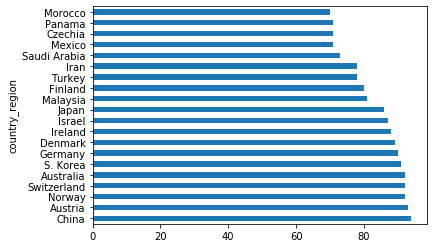

In [18]:
# We can see that the country has the highest recovery rate is China
x = covid19_df_q5.groupby("country_region")['recovery_rate'].max().sort_values(ascending=False)
print(x)
x[:20].plot(kind='barh')

In [19]:
# First prepare your dataframe, e.g. sort so x and y will align properly
XY = covid19_df_q5.sort_values('recovery_rate', ascending=False)
XY.head()


,country_region,total_cases,total_recovered,Cases>5000,recovery_rate
91,China,83001,78304,True,94
16,Austria,16731,15593,True,93
207,Australia,7195,6614,True,92
20,Norway,8440,7727,True,92
11,Switzerland,30862,28500,True,92


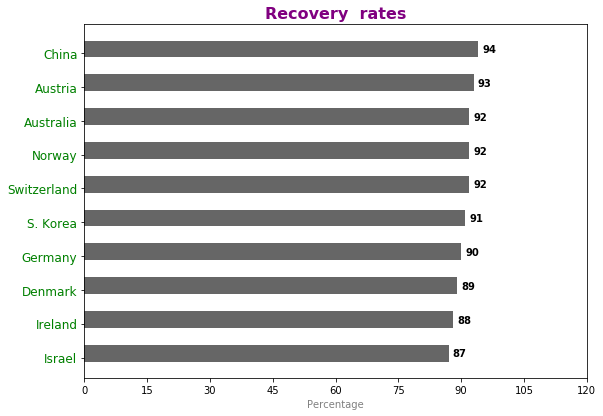

In [108]:
# These are options that I tried for x and y , but it mixed up the values. 
# Took country, e.g. 'country' = Russia, but displayed 'recovery rate' = 94 for China.
# x = covid19_df_q5["country_region"] #.loc[covid19_df_q5['Cases>5000'] == True]
# y = covid19_df_q5["recovery_rate"].sort_values(ascending=False).iloc[:20]
# Conclusion: in this specific case x and y axis should be treated together in a dataframe and not munipulated apart. 

x = XY['country_region']
y = XY['recovery_rate'][:10]

fig, ax = plt.subplots(figsize=(9, 6.5)) 
width = 0.5 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="0.4")
ax.set_yticks(ind+width/4)
for i, v in enumerate(y): # adding numbers to every line
        ax.text(v + 1, i + .1, str(v), color='black', fontweight='bold')
ax.set_yticklabels(x,color = "green", fontsize = 12, minor=False)
plt.xticks(range(0,125,15))
plt.title("Recovery  rates",color = "purple", fontsize = 16, fontweight="bold")
plt.xlabel("Percentage", color = "gray")
plt.gca().invert_yaxis()
plt.show()
